In [76]:
%matplotlib inline 
import numpy as np
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under pltimport pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## Model parameters

In [77]:
K = 121    # Number of times steps
dt = 0.01  # Delta t
c = 0.1    # Coefficient of drag
g = -9.81  # Gravity
# For constructing matrix B
bx = 0
by = 0
bz = 0
bvx = 0.25
bvy = 0.25
bvz = 0.1
# For constructing matrix C
rx = 1.0
ry = 5.0
rz = 5.0

# Part 1:
### Load true trajectory and plot it
### Normally, this data wouldn't be available in the real world


In [84]:
# Read the data
s_true = pd.read_csv('P4_trajectory.txt',header= None, names= ['x','y','z','vx','vy','vz'])
s_true.head()
#s_true.dtypes

,x,y,z,vx,vy,vz
0,0.00000,0.000000,2.0000,15.000,3.5000,4.0000
1,0.15000,0.035000,2.0400,15.201,3.5762,3.7671
2,0.30201,0.070762,2.0777,15.367,3.5569,3.7367
3,0.45567,0.106330,2.1150,15.049,3.7326,3.7979
4,0.60617,0.143660,2.1530,15.257,3.4421,3.5891


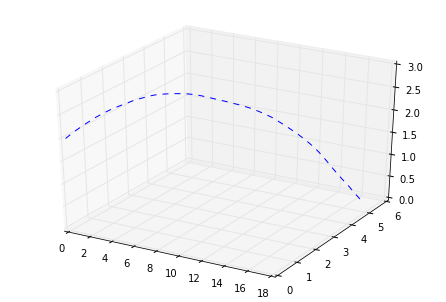

In [85]:
x_coords = s_true.x
y_coords = s_true.y
z_coords = s_true.z
ax = Axes3D(plt.figure())
ax.plot(x_coords, y_coords, z_coords,'--b', label='True trajectory');

# Part 2:
    
## Read the observation array and plot it (Part 2)

In [86]:
    s_obs = pd.read_csv('P4_measurements.txt',header= None, names= ['x','y','z'])
    s_obs.head()

,x,y,z
0,-0.283590,0.51762,13.778
1,0.097039,0.22967,11.878
2,0.944570,1.56630,11.302
3,-0.203330,-2.22600,12.203
4,1.077900,1.20320,10.080


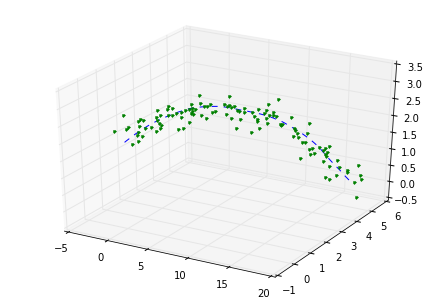

In [87]:
ax = Axes3D(plt.figure())
ax.plot(x_coords, y_coords, z_coords,'--b', label='True trajectory');
ax.plot(s_obs.x/1.0, s_obs.y/5.0, s_obs.z/5.0,'.g', label='Observed trajectory');


In [191]:
    A = np.array([[1,0,0,dt,0,0],
        [0,1,0,0,dt,0],
        [0,0,1,0,0,dt],
        [0,0,0,1-c*dt,0,0]
        ,[0,0,0,0,1-c*dt,0]
        ,[0,0,0,0,0,1-c*dt]])
    a = np.zeros([6,1])
    a[-1,0] = g*dt
    s = np.array([[0],[0],[2],[15],[3.5],[4.0]])
    print s_true.shape
    # Create matrix to store the s's
    s_blind = np.zeros((6,K-1))
    s_blind[:,0] = s[:,0]  
    print s_blind[:,K-2]

(120, 6)
[ 0.  0.  0.  0.  0.  0.]


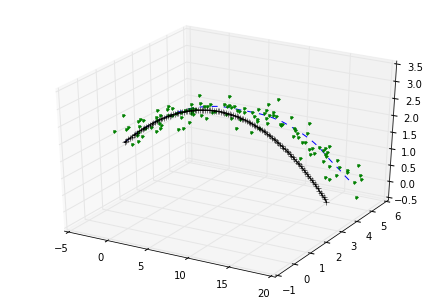

In [192]:
for k in range(1,K-1):
    s = A.dot(s) + a
    s_blind[:,k] = s[:,0]

# Now extract values of x, y and z
x_blind = s_blind[0,:]
y_blind = s_blind[1,:]
z_blind = s_blind[2,:]
ax = Axes3D(plt.figure())
ax.plot(x_coords, y_coords, z_coords,'--b', label='True trajectory');
ax.plot(s_obs.x/1.0, s_obs.y/5.0, s_obs.z/5.0,'.g', label='Observed trajectory');
ax.plot(x_blind, y_blind, z_blind,'-k+', label='Blind trajectory')
